In [9]:
import os
print(os.listdir("/content/drive/MyDrive/sentiment/data/raw"))

['IMDb_Dataset.csv']


In [10]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/sentiment/data/raw/IMDb_Dataset.csv")
df.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,Gladiator,8.5,2000,R,Action,Ridley Scott,David FranzoniJohn LoganWilliam Nicholson,67.0,155.0
1,Mission: Impossible - Dead Reckoning Part One,7.7,2023,PG-13,Action,Christopher McQuarrie,Tom CruiseHayley AtwellVing Rhames,81.0,163.0
2,Rebel Moon - Part Two: The Scargiver,5.2,2024,PG-13,Action,Zack Snyder,Zack SnyderKurt JohnstadShay Hatten,35.0,122.0
3,Inglourious Basterds,8.4,2009,R,Adventure,Quentin Tarantino,Brad PittDiane KrugerEli Roth,69.0,153.0
4,Borderlands,7.1,2024,R,Action,Eli Roth,Eli RothJoe Crombie,66.9,116.3


In [1]:
!pip install -q nltk wordcloud ipywidgets scikit-learn joblib
!jupyter nbextension enable --py widgetsnbextension || true

import sys
print("Installs finished. Python version:", sys.version)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.0 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Installs finished. Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]


In [2]:
from pathlib import Path
from google.colab import drive

# Mount Google Drive (follow the link, allow, then paste the code you get)
drive.mount('/content/drive')

# Set base folders
BASE_DIR = Path('/content/drive/MyDrive/sentiment')
DATA_RAW = BASE_DIR / 'data' / 'raw'
DATA_PROC = BASE_DIR / 'data' / 'processed'
MODELS = BASE_DIR / 'models'

# Create folders if they don’t exist
DATA_RAW.mkdir(parents=True, exist_ok=True)
DATA_PROC.mkdir(parents=True, exist_ok=True)
MODELS.mkdir(parents=True, exist_ok=True)

print("Base folder:", BASE_DIR)
print("Upload your IMDB_Dataset.csv file into:", DATA_RAW)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base folder: /content/drive/MyDrive/sentiment
Upload your IMDB_Dataset.csv file into: /content/drive/MyDrive/sentiment/data/raw


In [3]:
import os
print(os.listdir('/content/drive/MyDrive/sentiment/data/raw'))

['IMDb_Dataset.csv']


In [4]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/sentiment/data/raw/IMDb_Dataset.csv')
print("Shape:", df.shape)
df.head()

Shape: (400, 9)


,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,Gladiator,8.5,2000,R,Action,Ridley Scott,David FranzoniJohn LoganWilliam Nicholson,67.0,155.0
1,Mission: Impossible - Dead Reckoning Part One,7.7,2023,PG-13,Action,Christopher McQuarrie,Tom CruiseHayley AtwellVing Rhames,81.0,163.0
2,Rebel Moon - Part Two: The Scargiver,5.2,2024,PG-13,Action,Zack Snyder,Zack SnyderKurt JohnstadShay Hatten,35.0,122.0
3,Inglourious Basterds,8.4,2009,R,Adventure,Quentin Tarantino,Brad PittDiane KrugerEli Roth,69.0,153.0
4,Borderlands,7.1,2024,R,Action,Eli Roth,Eli RothJoe Crombie,66.9,116.3


In [5]:
import matplotlib.pyplot as plt

print("Columns:", df.columns.tolist())
print("Missing values:\n", df.isnull().sum())
print("Sentiment counts:\n", df['sentiment'].value_counts())

plt.figure(figsize=(5,4))
df['sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment distribution")
plt.show()

Columns: ['Title', 'IMDb Rating', 'Year', 'Certificates', 'Genre', 'Director', 'Star Cast', 'MetaScore', 'Duration (minutes)']
Missing values:
 Title                 0
IMDb Rating           0
Year                  0
Certificates          0
Genre                 0
Director              0
Star Cast             0
MetaScore             0
Duration (minutes)    0
dtype: int64


KeyError: 'sentiment'

In [6]:
print(df.columns.tolist())

['Title', 'IMDb Rating', 'Year', 'Certificates', 'Genre', 'Director', 'Star Cast', 'MetaScore', 'Duration (minutes)']


In [7]:
import matplotlib.pyplot as plt

# show column names
print("Columns:", df.columns.tolist())

# find correct sentiment column (case-insensitive)
sent_col = None
for c in df.columns:
    if c.lower() == "sentiment":
        sent_col = c
        break

if sent_col is None:
    raise ValueError("No 'sentiment' column found. Check column names above.")

print("Using sentiment column:", sent_col)

print("Missing values:\n", df.isnull().sum())
print("Sentiment counts:\n", df[sent_col].value_counts())

plt.figure(figsize=(5,4))
df[sent_col].value_counts().plot(kind='bar')
plt.title("Sentiment distribution")
plt.show()

Columns: ['Title', 'IMDb Rating', 'Year', 'Certificates', 'Genre', 'Director', 'Star Cast', 'MetaScore', 'Duration (minutes)']


ValueError: No 'sentiment' column found. Check column names above.

In [12]:
import os
print(os.listdir('/content/drive/MyDrive/sentiment/data/raw'))

['IMDb_Dataset.csv']


In [19]:
import os
print(os.listdir("/content/drive"))

['.shortcut-targets-by-id', 'MyDrive', '.Trash-0', '.Encrypted']


In [20]:
print(os.listdir("/content/drive/MyDrive"))

['5_6269257358451410887.pdf', 'CUETAdmitCard-233510195481.pdf', 'MAYURA23RA142 (1).jpg', 'MAYURA23RA142.jpg', 'plus two.pdf', 'sslc.pdf', 'adhar .pdf', 'income certificate.pdf', 'photo.jpg', 'migration.jpg', '23RA142_caste.pdf', 'Photo from Mayura Krishnan', 'niya .pdf', 'Document from Mayura Krishnan.pdf', 'Classroom', 'physics assignment 2 (1).pdf', 'physics assignment 2.pdf', '23RA142_Income certificate.pdf', 'caste certificate.pdf', 'memo.pdf', 'native.pdf', 'Bank pass.pdf', 'hostel certificate.pdf', 'Googlepay.png', 'IMG_20250717_210429.jpg', 'mayura.pdf', 'mayura', 'fds.pdf', 'fds tuto.pdf', 'Colab Notebooks', 'sentiment']


In [21]:
print(os.listdir("/content/drive/MyDrive/sentiment/data/raw"))

['IMDB Dataset.csv']


In [23]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/sentiment/data/raw/IMDB Dataset.csv")
print("Shape:", df.shape)
df.head()

Shape: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Columns: ['review', 'sentiment']
Missing values:
 review       0
sentiment    0
dtype: int64
Sentiment counts:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


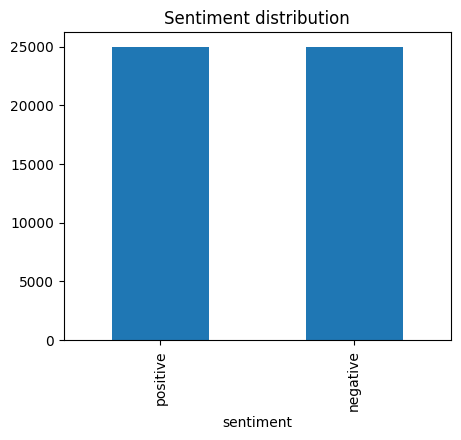

In [24]:
import matplotlib.pyplot as plt

print("Columns:", df.columns.tolist())
print("Missing values:\n", df.isnull().sum())
print("Sentiment counts:\n", df['sentiment'].value_counts())

plt.figure(figsize=(5,4))
df['sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment distribution")
plt.show()

In [26]:
import re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'http\\S+|www\\S+', '', text)
    text = re.sub(r'[^a-zA-Z\\s]', '', text)
    text = re.sub(r'\\s+', ' ', text).strip()
    return text

def advanced_preprocess(text):
    text = clean_text(text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

df['processed_review'] = df['review'].apply(advanced_preprocess)
df[['review','processed_review','sentiment']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,processed_review,sentiment
0,One of the other reviewers has mentioned that ...,oneoftheotherreviewershasmentionedthatafterwat...,positive
1,A wonderful little production. <br /><br />The...,awonderfullittleproductionthefilmingtechniquei...,positive
2,I thought this was a wonderful way to spend ti...,ithoughtthiswasawonderfulwaytospendtimeonatooh...,positive
3,Basically there's a family where a little boy ...,basicallytheresafamilywherealittleboyjakethink...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",pettermatteisloveinthetimeofmoneyisavisuallyst...,positive


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = df['processed_review']
y = df['sentiment']

# split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# convert text to TF-IDF vectors
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Train shape:", X_train_tfidf.shape)
print("Test shape:", X_test_tfidf.shape)

Train shape: (40000, 5000)
Test shape: (10000, 5000)


In [29]:
import re
import nltk
nltk.download('stopwords')  # only needed if you want stopword removal

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# ---- Step 6: Simpler preprocessing ----
def simple_preprocess(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\\s]', '', text)   # keep only letters + spaces
    return text

df['processed_review'] = df['review'].apply(simple_preprocess)

# ---- Step 7: TF-IDF + Split ----
X = df['processed_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Train shape:", X_train_tfidf.shape)
print("Test shape:", X_test_tfidf.shape)

# ---- Step 8: Train Logistic Regression ----
model = LogisticRegression(max_iter=2000)
model.fit(X_train_tfidf, y_train)

preds = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Train shape: (40000, 20000)
Test shape: (10000, 20000)
Accuracy: 0.5
              precision    recall  f1-score   support

    negative       0.50      1.00      0.67      5000
    positive       0.00      0.00      0.00      5000

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
print("Unique sentiment values in your dataset:")
print(df['sentiment'].unique())

print("\nHow many of each:")
print(df['sentiment'].value_counts())

Unique sentiment values in your dataset:
['positive' 'negative']

How many of each:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# ---- Step 1: Split data (use raw reviews) ----
X = df['review'].str.lower()   # only lowercase, no heavy cleaning
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- Step 2: TF-IDF ----
tfidf = TfidfVectorizer(max_features=50000, ngram_range=(1,2))  # keep unigrams + bigrams
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF shapes:", X_train_tfidf.shape, X_test_tfidf.shape)

# ---- Step 3: Logistic Regression ----
lr_model = LogisticRegression(max_iter=3000, class_weight='balanced')
lr_model.fit(X_train_tfidf, y_train)
lr_preds = lr_model.predict(X_test_tfidf)

print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

# ---- Step 4: Naive Bayes ----
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_preds = nb_model.predict(X_test_tfidf)

print("\n--- Naive Bayes ---")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print(classification_report(y_test, nb_preds))

TF-IDF shapes: (40000, 50000) (10000, 50000)

--- Logistic Regression ---
Accuracy: 0.9089
              precision    recall  f1-score   support

    negative       0.91      0.90      0.91      5000
    positive       0.91      0.91      0.91      5000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000


--- Naive Bayes ---
Accuracy: 0.882
              precision    recall  f1-score   support

    negative       0.88      0.88      0.88      5000
    positive       0.88      0.89      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [6]:
import os
print(os.listdir("/content/drive/MyDrive"))

['Colab Notebooks', '5_6269257358451410887.pdf', 'CUETAdmitCard-233510195481.pdf', 'MAYURA23RA142 (1).jpg', 'MAYURA23RA142.jpg', 'plus two.pdf', 'sslc.pdf', 'adhar .pdf', 'income certificate.pdf', 'photo.jpg', 'migration.jpg', '23RA142_caste.pdf', 'Photo from Mayura Krishnan', 'niya .pdf', 'Document from Mayura Krishnan.pdf', 'Classroom', 'physics assignment 2 (1).pdf', 'physics assignment 2.pdf', '23RA142_Income certificate.pdf', 'caste certificate.pdf', 'memo.pdf', 'native.pdf', 'Bank pass.pdf', 'hostel certificate.pdf', 'Googlepay.png', 'IMG_20250717_210429.jpg', 'mayura.pdf', 'mayura', 'fds.pdf', 'fds tuto.pdf', 'sentiment']


In [7]:
print(os.listdir("/content/drive/MyDrive/sentiment"))
print(os.listdir("/content/drive/MyDrive/sentiment/data"))
print(os.listdir("/content/drive/MyDrive/sentiment/data/raw"))

['data', 'models']
['raw', 'processed']
['IMDB Dataset.csv']


In [9]:
df = pd.read_csv("/content/drive/MyDrive/sentiment/data/raw/IMDB Dataset.csv")
print(df.shape)
df.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
import os, pandas as pd
folder = "/content/drive/MyDrive/sentiment/data/raw"

# show files and pick the first CSV automatically
print("Files in folder:", os.listdir(folder))
csv_files = [f for f in os.listdir(folder) if f.lower().endswith('.csv')]

if not csv_files:
    raise FileNotFoundError(f"No CSV files found in {folder}. Please upload your IMDB CSV there.")

chosen = csv_files[0]
path = os.path.join(folder, chosen)
print("Auto-loading:", chosen)
df = pd.read_csv(path)
print("Loaded:", path, "-> shape:", df.shape)
display(df.head())

Files in folder: ['IMDB Dataset.csv']
Auto-loading: IMDB Dataset.csv
Loaded: /content/drive/MyDrive/sentiment/data/raw/IMDB Dataset.csv -> shape: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# ---- Step 1: Load dataset ----
df = pd.read_csv("/content/drive/MyDrive/sentiment/data/raw/IMDB Dataset.csv")
print("Dataset loaded:", df.shape)

# ---- Step 2: Train/Test split ----
X = df['review'].str.lower()
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- Step 3: TF-IDF ----
tfidf = TfidfVectorizer(max_features=50000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print("TF-IDF shapes:", X_train_tfidf.shape, X_test_tfidf.shape)

# ---- Step 4: Train Logistic Regression ----
lr_model = LogisticRegression(max_iter=3000, class_weight='balanced')
lr_model.fit(X_train_tfidf, y_train)

# Evaluate
preds = lr_model.predict(X_test_tfidf)
print("\nAccuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

# ---- Step 5: Save model + vectorizer ----
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(lr_model, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print("\n✅ Model and vectorizer saved!")

# ---- Step 6: Load model + vectorizer again ----
with open("logistic_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

with open("tfidf_vectorizer.pkl", "rb") as f:
    loaded_tfidf = pickle.load(f)

print("✅ Model and vectorizer reloaded!")

# ---- Step 7: Predict on new reviews ----
new_reviews = [
    "The movie was absolutely fantastic, I loved every moment!",
    "Worst movie I have ever seen, complete waste of time."
]

new_X = loaded_tfidf.transform(new_reviews)
new_preds = loaded_model.predict(new_X)

for review, pred in zip(new_reviews, new_preds):
    print(f"\nReview: {review}\nPredicted Sentiment: {pred}")

Dataset loaded: (50000, 2)
TF-IDF shapes: (40000, 50000) (10000, 50000)

Accuracy: 0.9089
              precision    recall  f1-score   support

    negative       0.91      0.90      0.91      5000
    positive       0.91      0.91      0.91      5000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000


✅ Model and vectorizer saved!
✅ Model and vectorizer reloaded!

Review: The movie was absolutely fantastic, I loved every moment!
Predicted Sentiment: positive

Review: Worst movie I have ever seen, complete waste of time.
Predicted Sentiment: negative
